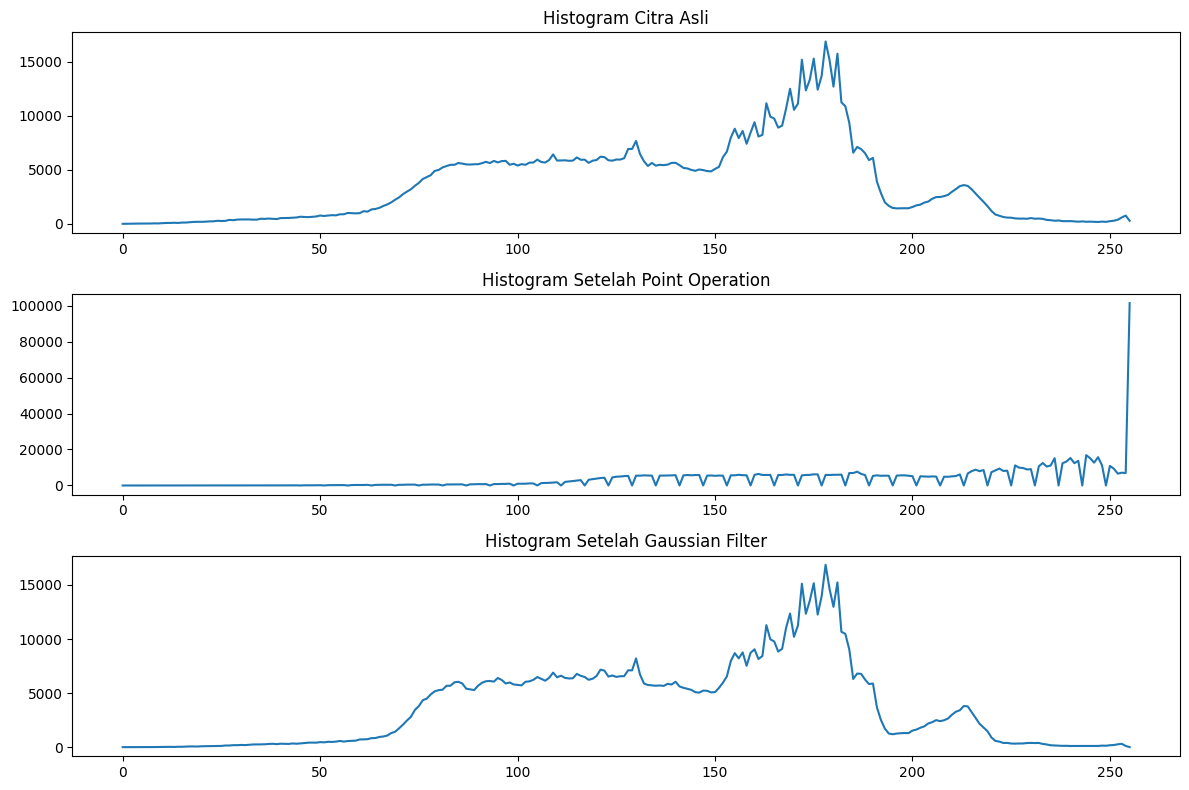

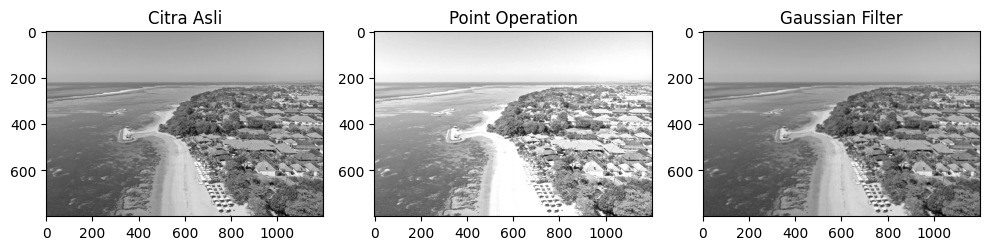

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#point op
def adjust_brightness_contrast(image, alpha=1.2, beta=30):
    """
    alpha : contrast control (1.0-3.0)
    beta  : brightness control (0-100)
    """
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

#filter
def apply_gaussian_filter(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

#Histogram
def calculate_histogram(image):
    hist = cv2.calcHist(
        [image],
        [0],
        None,
        [256],
        [0, 256]
    )
    return hist

# Main
def main():
    image_path = r"./dataset/sanur.jpg"

    image = cv2.imread(image_path)
    if image is None:
        print("Error: Gambar tidak terbaca. Pastikan file ada di folder notebook!")
        return

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    point_result = adjust_brightness_contrast(gray)
    filter_result = apply_gaussian_filter(gray)

    hist_original = calculate_histogram(gray)
    hist_point = calculate_histogram(point_result)
    hist_filter = calculate_histogram(filter_result)

    #DIsplaykan histogr
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1); plt.plot(hist_original); plt.title("Histogram Citra Asli")
    plt.subplot(3, 1, 2); plt.plot(hist_point); plt.title("Histogram Setelah Point Operation")
    plt.subplot(3, 1, 3); plt.plot(hist_filter); plt.title("Histogram Setelah Gaussian Filter")
    plt.tight_layout(); plt.show()

    #Tampilin gamber
    plt.figure(figsize=(10,4))
    plt.subplot(1,3,1); plt.imshow(gray, cmap='gray'); plt.title("Citra Asli")
    plt.subplot(1,3,2); plt.imshow(point_result, cmap='gray'); plt.title("Point Operation")
    plt.subplot(1,3,3); plt.imshow(filter_result, cmap='gray'); plt.title("Gaussian Filter")
    plt.tight_layout(); plt.show()


main()
